In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## **Data overview analysis**

In [8]:
df = pd.read_csv('/content/drive/MyDrive/credit scoring model/data/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
def data_overview(df):

    num_rows = df.shape[0]
    num_columns = df.shape[1]
    data_types = df.dtypes

    print(f"Number of rows:{num_rows}")
    print(f"Number of columns:{num_columns}")
    print(f"Data types of each column:\n{data_types}")

data_overview(df)

Number of rows:95662
Number of columns:16
Data types of each column:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [7]:
def summarize_dataset(df):

    # Select numerical columns only
    numerical_columns=['Amount','Value']

    # Initialize a list to hold summary statistics for each column
    summary_list = []

    for col in numerical_columns:
        summary_stats = {
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Mode': df[col].mode().iloc[0],  # Taking the first mode in case of multiple modes
            'Standard Deviation': df[col].std(),
            'Variance': df[col].var(),
            'Range': df[col].max() - df[col].min(),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurtosis()
        }

        # Append the summary statistics for the current column to the list
        summary_list.append(summary_stats)

    # Convert summary stats list to DataFrame with appropriate index
    summary_df = pd.DataFrame(summary_list, index=numerical_columns)

    return summary_df
summarize_dataset(df)

,Mean,Median,Mode,Standard Deviation,Variance,Range,IQR,Skewness,Kurtosis
Amount,6717.846433,1000.0,1000.0,123306.797164,1.520457e+10,10880000.0,2850.0,51.098490,3363.127739
Value,9900.583941,1000.0,1000.0,123122.087776,1.515905e+10,9879998.0,4725.0,51.291086,3378.069274


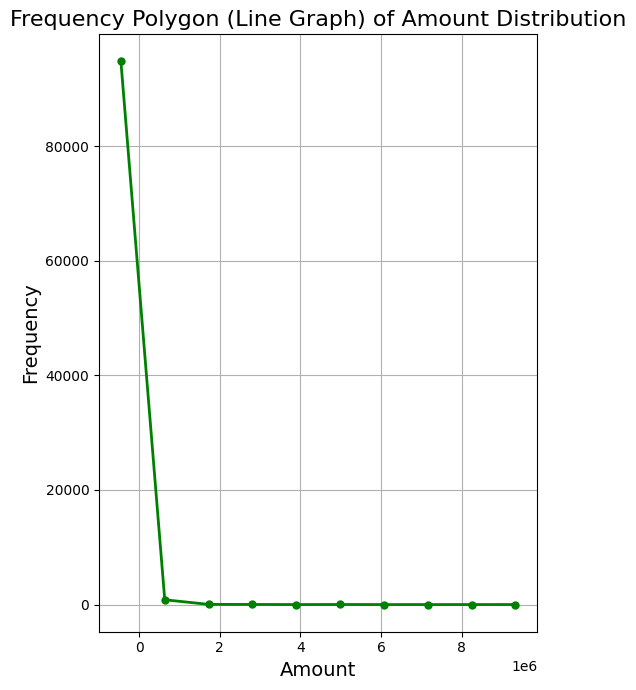

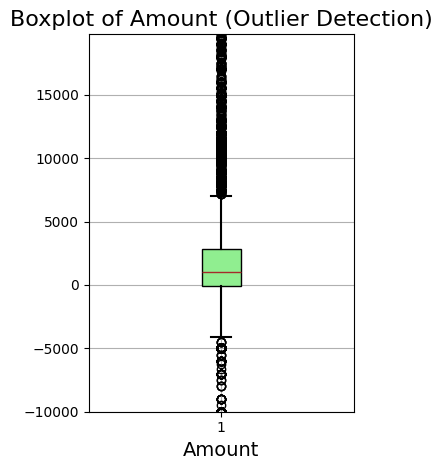

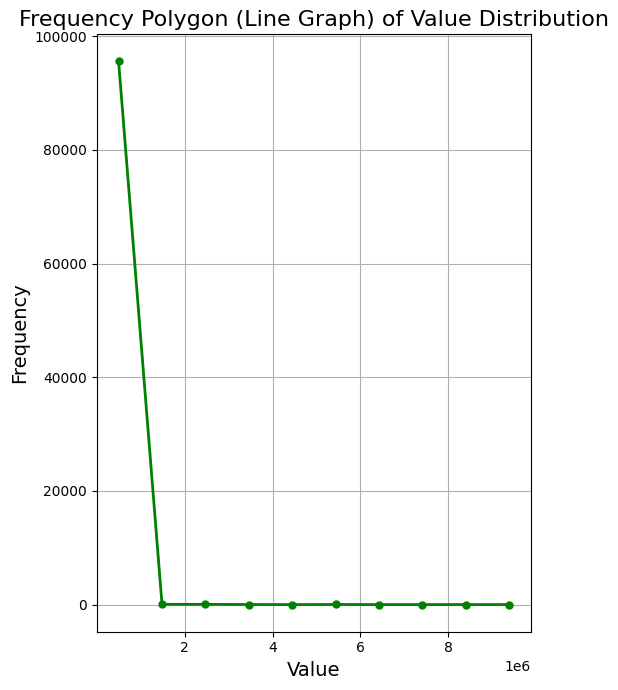

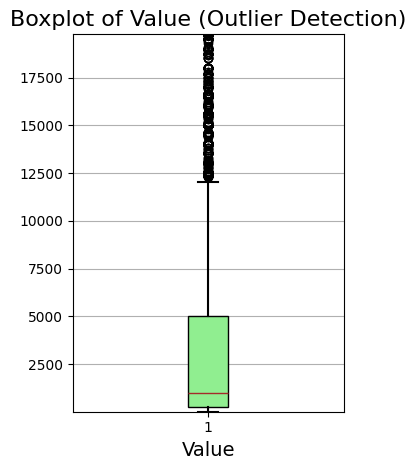

In [11]:
def plot_numerical_distributions(df):
    # Select numerical columns only
    numerical_columns=['Amount','Value']

    # Create histograms and boxplots for each numerical feature
    for col in numerical_columns:
        plt.figure(figsize=(10, 7))
        plt.subplot(1, 2, 1)
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame")

        # Drop NaN values for the selected column
        data = df[col].dropna()

        # Create a histogram to get frequency and bin edges
        frequency, bin_edges = np.histogram(data, bins=10)

        # Get the bin centers
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

        # Plot the line graph for frequency distribution

        plt.plot(bin_centers, frequency, color='green', marker='o', linestyle='-', linewidth=2, markersize=5)

        # Adding titles and labels
        plt.title(f'Frequency Polygon (Line Graph) of {col} Distribution', fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)

        # Set x-axis limits to the minimum and maximum values of the column
        plt.xlim(data.min(), data.max())

        # Display the grid
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Create the box plot
        plt.subplot(1, 2, 2)
        box = plt.boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='lightgreen'),
                        medianprops=dict(color='brown'),
                        whiskerprops=dict(color='black', linewidth=1.5),
                        capprops=dict(color='black', linewidth=1.5))

        # Set title and labels
        plt.title(f'Boxplot of {col} (Outlier Detection)', fontsize=16)
        plt.xlabel(col, fontsize=14)

        # Set y-axis limits
        if(col=='Value'):
            plt.ylim(df[col].min(), df[col].max() * 0.002)  # Adjust as necessary to see the box clearly
        elif(col=='Amount'):
            plt.ylim(df[col].min()* 0.01,  df[col].max()* 0.002)  # Adjust as necessary to see the box clearly

        # Show the plot
        plt.grid()
        plt.tight_layout()
        plt.show()

plot_numerical_distributions(df)

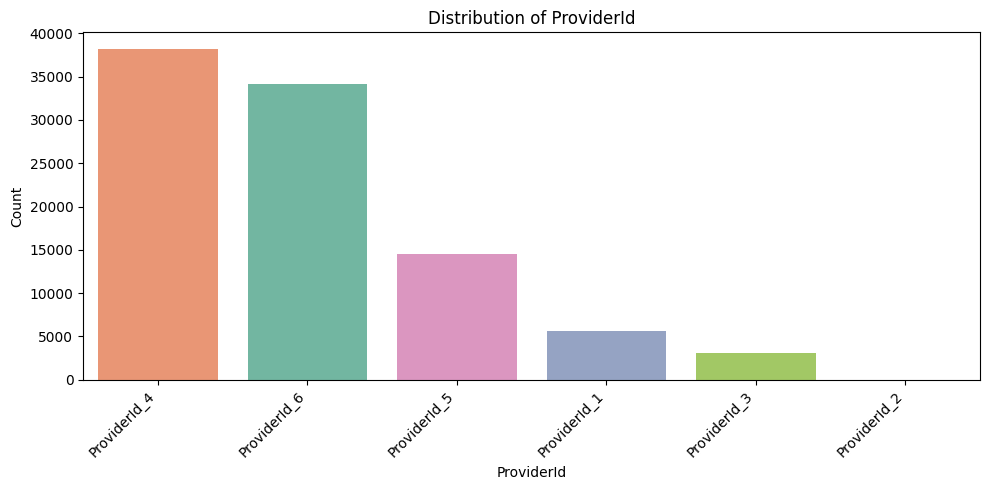

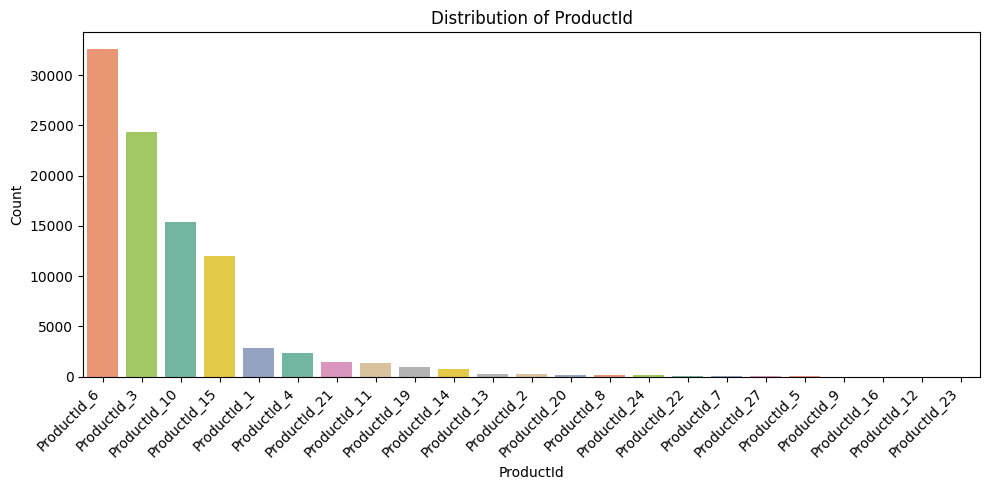

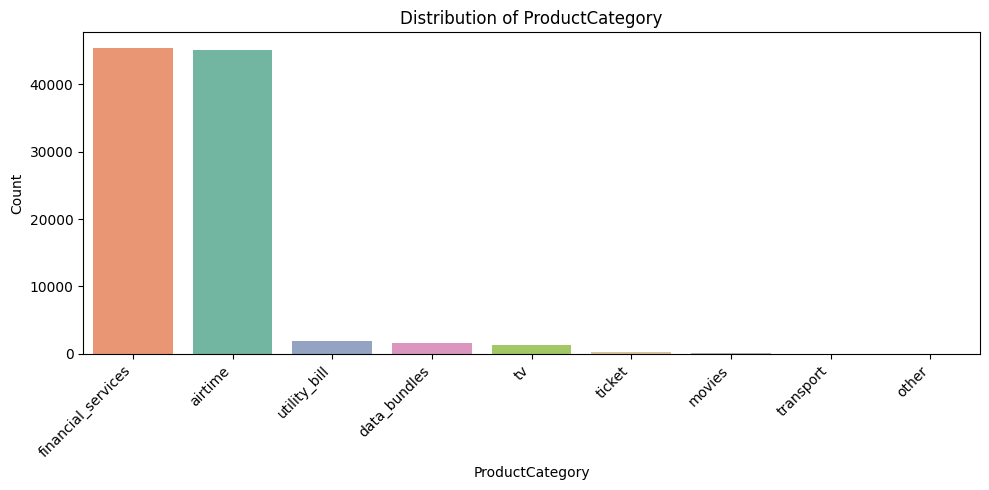

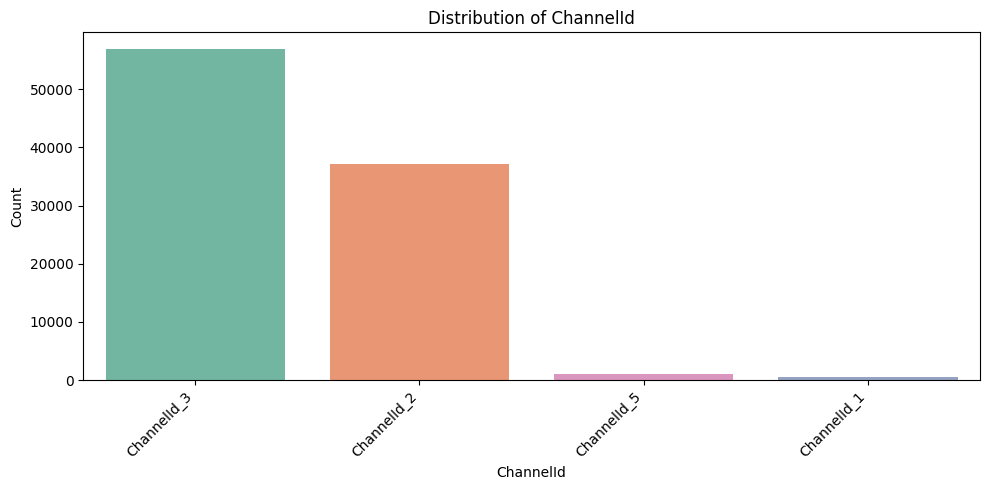

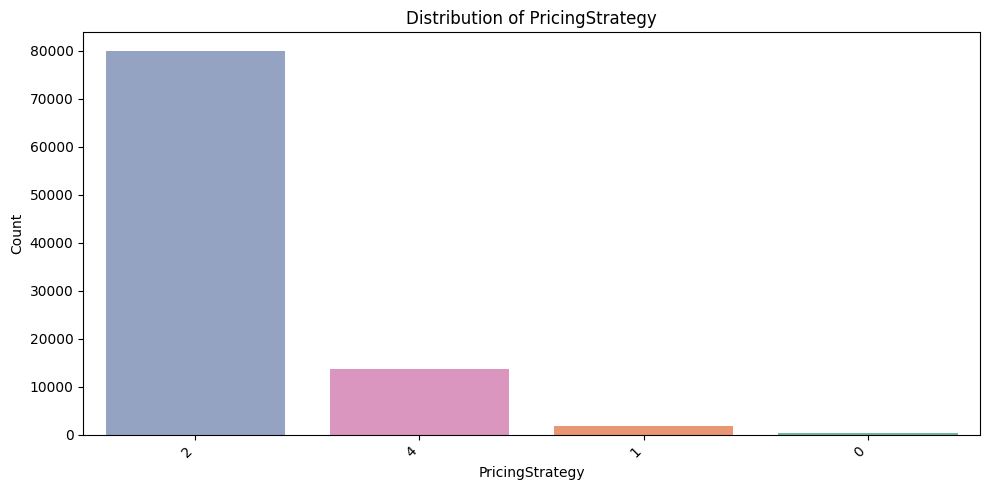

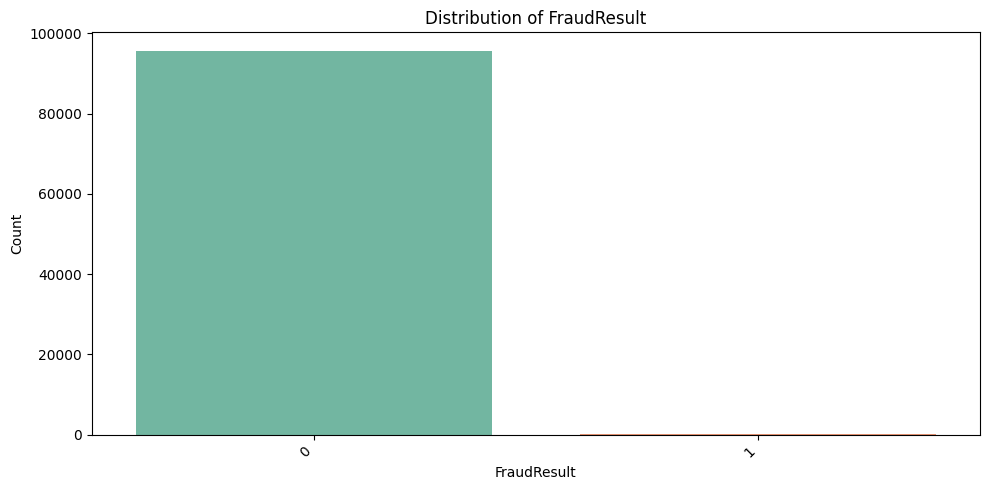

In [12]:
def plot_categorical_distributions(df):
    # Select categorical columns only
    categorical_columns=['ProviderId','ProductId','ProductCategory','ChannelId','PricingStrategy','FraudResult']

    # Create bar plots for each categorical feature
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))

        # Plot a bar chart for the frequency of each category
        sns.countplot(x=df[col], order=df[col].value_counts().index, hue=df[col], palette="Set2", legend=False)

        # sns.countplot(x=df[col], order=df[col].value_counts().index, palette="Set2")

        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

plot_categorical_distributions(df)

In [14]:
def check_missing_value(df):
    #check missing value
    if(df.isnull().sum().sum()):
        print(f"The number of missing values:{df.isnull().sum().sum()}")
        # print("There no null value in the data")
    else:
        # print(f"The number of null values:{df.isnull().sum().sum()}")
        print("There is no missing value in the data")

check_missing_value(df)

There is no missing value in the data


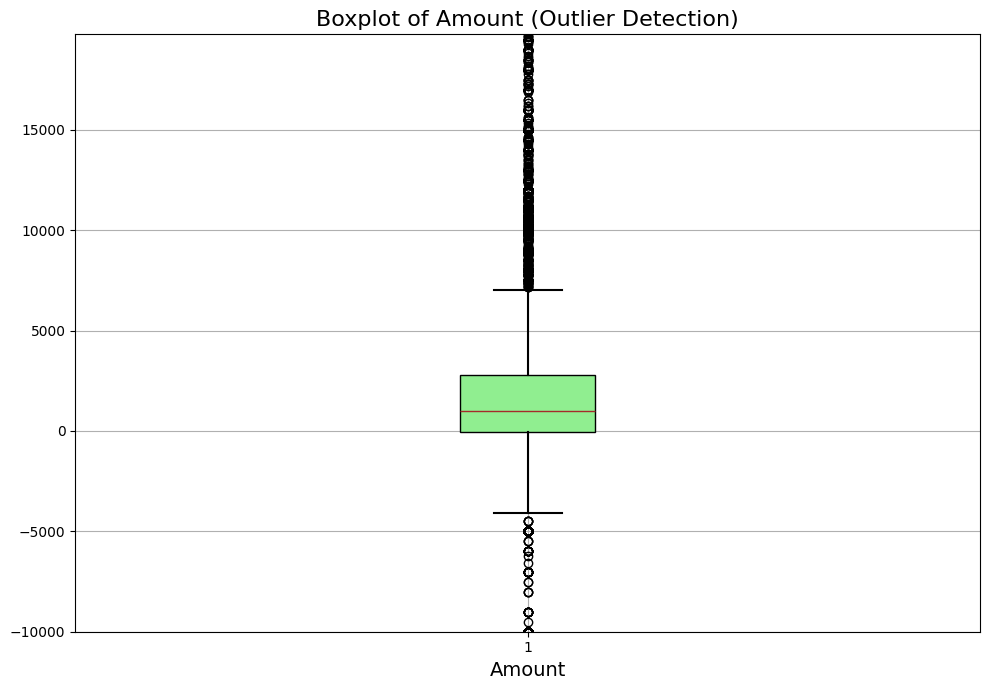

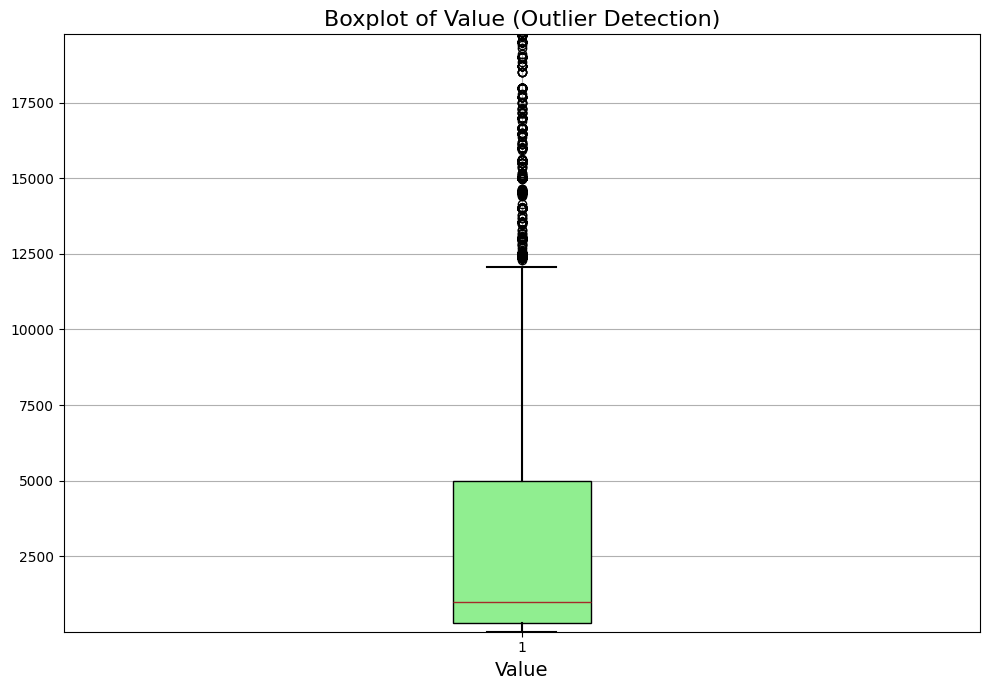

In [15]:
def plot_outliers_boxplots(df):
    # Select numerical columns only
    numerical_columns = ['Amount', 'Value']

    # Create box plots for each numerical feature to detect outliers
    for col in numerical_columns:
        fig = plt.figure(figsize=(10, 7))

        # Create the box plot
        box = plt.boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='lightgreen'),
                        medianprops=dict(color='brown'),
                        whiskerprops=dict(color='black', linewidth=1.5),
                        capprops=dict(color='black', linewidth=1.5))

        # Set title and labels
        plt.title(f'Boxplot of {col} (Outlier Detection)', fontsize=16)
        plt.xlabel(col, fontsize=14)

        # Set y-axis limits
        if(col=='Value'):
            plt.ylim(df[col].min(), df[col].max() * 0.002)  # Adjust as necessary to see the box clearly
        elif(col=='Amount'):
            plt.ylim(df[col].min()* 0.01,  df[col].max()* 0.002)  # Adjust as necessary to see the box clearly

        # Show the plot
        plt.grid()
        plt.tight_layout()
        plt.show()

plot_outliers_boxplots(df)

# **Feature engineering**

In [18]:
def create_aggregate_features(df):
        # Group data by CustomerId and apply aggregation functions
        aggregate_df = df.groupby('CustomerId').agg(
            total_transaction_amount=('Amount', 'sum'),
            average_transaction_amount=('Amount', 'mean'),
            transaction_count=('TransactionId', 'count'),
            std_transaction_amount=('Amount', 'std')
        ).reset_index()

        # Fill NaN values in std_transaction_amount (e.g., for customers with only one transaction)
        aggregate_df.fillna({'std_transaction_amount':0},inplace=True)

        return aggregate_df

create_aggregate_features(df)

,CustomerId,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount
0,CustomerId_1,-10000.0,-10000.000000,1,0.000000
1,CustomerId_10,-10000.0,-10000.000000,1,0.000000
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333
3,CustomerId_1002,4225.0,384.090909,11,560.498966
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146
...,...,...,...,...,...
3737,CustomerId_992,20000.0,3333.333333,6,6088.240030
3738,CustomerId_993,20000.0,4000.000000,5,6745.368782
3739,CustomerId_994,543873.0,5384.881188,101,14800.656784
3740,CustomerId_996,139000.0,8176.470588,17,4433.329648


In [19]:
 def extract_transaction_features(df):
        # Convert TransactionStartTime to datetime format if not already done
        df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

        # Extract hour of the transaction
        df['TransactionHour'] = df['TransactionStartTime'].dt.hour

        # Extract day of the month when the transaction occurred
        df['TransactionDay'] = df['TransactionStartTime'].dt.day

        # Extract month when the transaction occurred
        df['TransactionMonth'] = df['TransactionStartTime'].dt.month

        # Extract year when the transaction occurred
        df['TransactionYear'] = df['TransactionStartTime'].dt.year

        return df

extract_transaction_features(df)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0,9,13,2,2019
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0,9,13,2,2019
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35+00:00,2,0,9,13,2,2019
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0,10,13,2,2019


In [21]:
def encode_categorical_variables(df):
        # Define the list of categorical columns to encode
        categorical_columns = ['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'PricingStrategy']

        # Apply One-Hot Encoding to the specified categorical columns
        df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

        # Find the newly created one-hot encoded columns
        new_columns = [col for col in df_encoded.columns if any(cat_col in col for cat_col in categorical_columns)]

        # Convert only the one-hot encoded columns to 0 and 1
        df_encoded[new_columns] = df_encoded[new_columns].astype(int)

        return df_encoded

encode_categorical_variables(df)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,...,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,1000.0,1000,2018-11-15 02:18:49+00:00,...,0,0,0,0,0,1,0,0,1,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,-20.0,20,2018-11-15 02:19:08+00:00,...,0,0,0,0,1,0,0,0,1,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,500.0,500,2018-11-15 02:44:21+00:00,...,0,0,0,0,0,1,0,0,1,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,20000.0,21800,2018-11-15 03:32:55+00:00,...,0,0,0,1,0,1,0,0,1,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,-644.0,644,2018-11-15 03:34:21+00:00,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,-1000.0,1000,2019-02-13 09:54:09+00:00,...,0,0,0,0,1,0,0,0,1,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,1000.0,1000,2019-02-13 09:54:25+00:00,...,0,0,0,0,0,1,0,0,1,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,-20.0,20,2019-02-13 09:54:35+00:00,...,0,0,0,0,1,0,0,0,1,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,3000.0,3000,2019-02-13 10:01:10+00:00,...,0,0,1,0,0,1,0,0,1,0
